In [11]:
library(data.table)
library(dplyr)
library(ggplot2)
library(knitr)
library(stringr)
library(DT)
library(plotly)
library(arules)
library(arulesViz)
library(visNetwork)
library(igraph)
library(kableExtra)
library(RColorBrewer)

location_data = read.table(file = '../../data/nCoV2019/for_use/geographic_age.tsv', sep = '\t', header = TRUE,
                           row.names = 1)

# Change all columns to be of type "logical"
for(i in c(1:ncol(location_data))) {
    location_data[,i] <- as.logical(location_data[,i])
}

# Adjust names
names(location_data) <- gsub("X", "", names(location_data), fixed=TRUE)
names(location_data) <- gsub(".", "-", names(location_data), fixed=TRUE)

head(location_data)

,0-9,10-19,120-129,20-29,30-39,40-49,50-59,60-69,70-79,80-89,90-99
,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
"Abu Dhabi, Abu Dhabi, United Arab Emirates",FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
"Ada County, Idaho, United States",FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE
"Adams County, Colorado, United States",FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE
"Alachua County, Florida, United States",TRUE,FALSE,FALSE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE,TRUE
"Alameda County, California, United States",FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
"Alb-Donau District, Baden-Wurttemberg, Germany",FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE


# Convert data frame to binary transaction matrix

In [2]:
location_data_transactions <- as(location_data, "transactions")
summary(location_data_transactions)

transactions as itemMatrix in sparse format with
 245 rows (elements/itemsets/transactions) and
 11 columns (items) and a density of 0.2467532 

most frequent items:
  50-59   60-69   30-39   40-49   20-29 (Other) 
    115      98      96      94      87     175 

element (itemset/transaction) length distribution:
sizes
  1   2   3   4   5   6   7   8   9  10  11 
119  36  20  26  10   9   9   6   6   3   1 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   1.000   2.000   2.714   4.000  11.000 

includes extended item information - examples:
   labels variables levels
1     0-9       0-9   TRUE
2   10-19     10-19   TRUE
3 120-129   120-129   TRUE

includes extended transaction information - examples:
                               transactionID
1 Abu Dhabi, Abu Dhabi, United Arab Emirates
2           Ada County, Idaho, United States
3      Adams County, Colorado, United States

In [3]:
f <- itemFrequency(location_data_transactions)
summary(f)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.004082 0.114286 0.265306 0.246753 0.387755 0.469388 

pdf 
  3

png 
  2

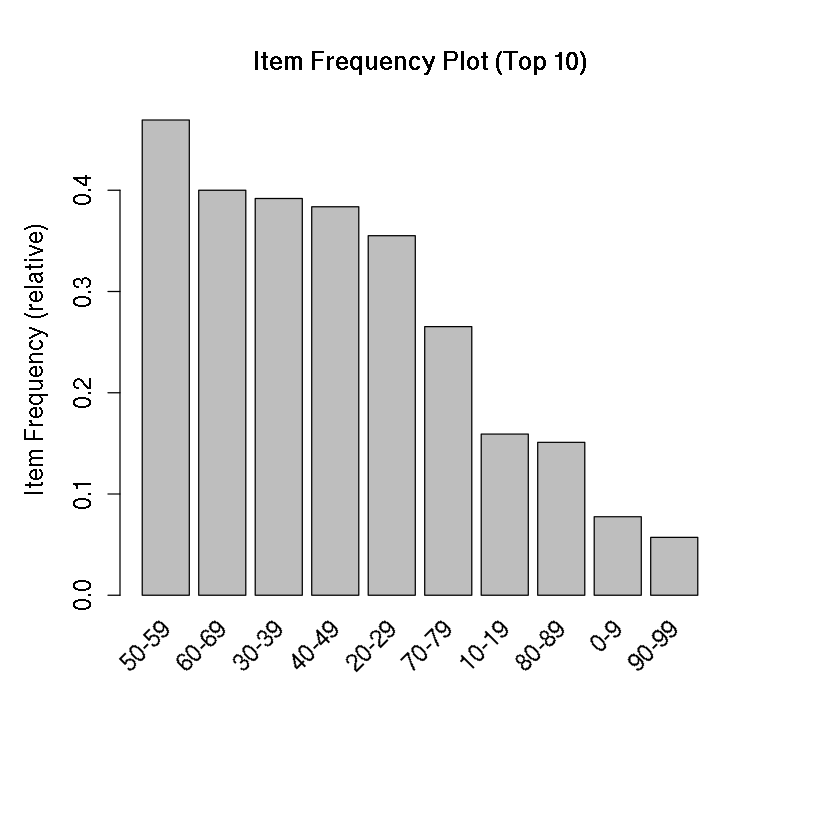

In [4]:
arules::itemFrequencyPlot(items(location_data_transactions),
    topN=10,
    cex.axis=1.3,
    cex.names=1.3,
    cex.lab=1.3,
    cex.main=1.3,
    main='Item Frequency Plot (Top 10)',
    type="relative",
    ylab="Item Frequency (relative)",
    names=TRUE,
    mai=c(2,1,1,1))
dev.copy(pdf, "geo-age-item-frequency.pdf")
dev.off()

# Generate rules

In [5]:
location_rules <- apriori(location_data_transactions, parameter=list(support=0.14, confidence=0.5))
location_rules

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.5    0.1    1 none FALSE            TRUE       5    0.14      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 34 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[11 item(s), 245 transaction(s)] done [0.00s].
sorting and recoding items ... [8 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 done [0.00s].
writing ... [54 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


set of 54 rules 

Itemsets in Antecedent (LHS)
 [1] "{40-49,60-69}"       "{20-29,40-49,50-59}" "{30-39,40-49,50-59}"
 [4] "{50-59,70-79}"       "{20-29,30-39,50-59}" "{40-49,50-59}"      
 [7] "{50-59,60-69}"       "{30-39,60-69}"       "{60-69,70-79}"      
[10] "{30-39,50-59}"       "{20-29,40-49}"       "{30-39,40-49}"      
[13] "{20-29,30-39,40-49}" "{40-49,70-79}"       "{20-29,30-39}"      
[16] "{20-29,60-69}"       "{20-29,50-59}"       "{70-79}"            
[19] "{30-39}"             "{20-29}"             "{40-49}"            
[22] "{60-69}"             "{50-59}"            
Itemsets in Consequent (RHS)
[1] "{50-59}" "{60-69}" "{30-39}" "{40-49}" "{20-29}" "{70-79}"


pdf 
  3

png 
  2

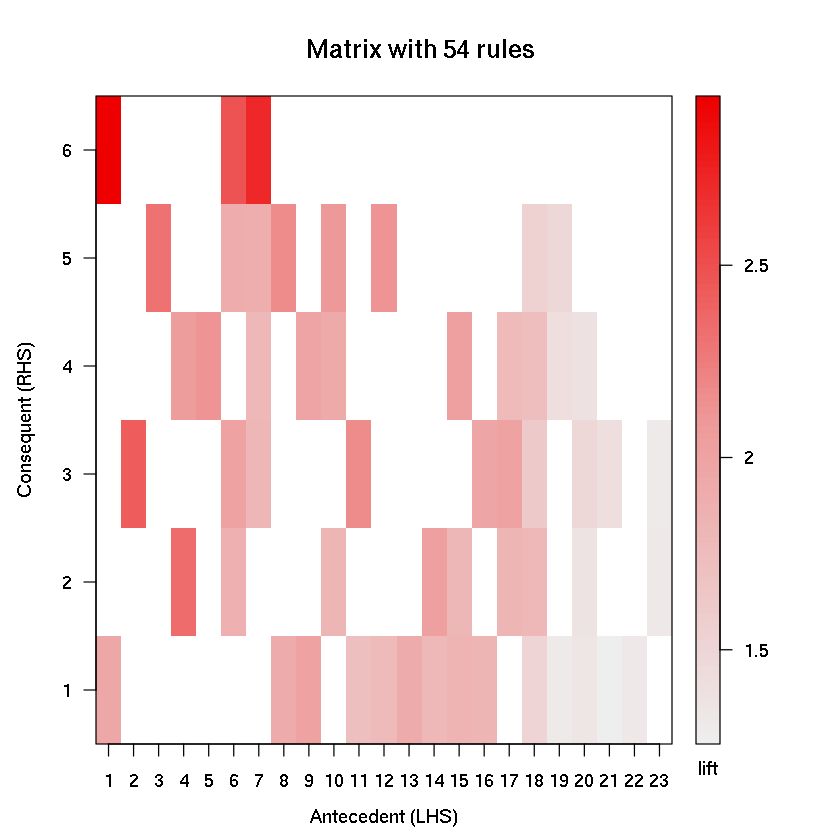

In [6]:
plot(location_rules, method="matrix", measure="lift")
dev.copy(pdf, "geo-age-matrix.pdf")
dev.off()

pdf 
  3

png 
  2

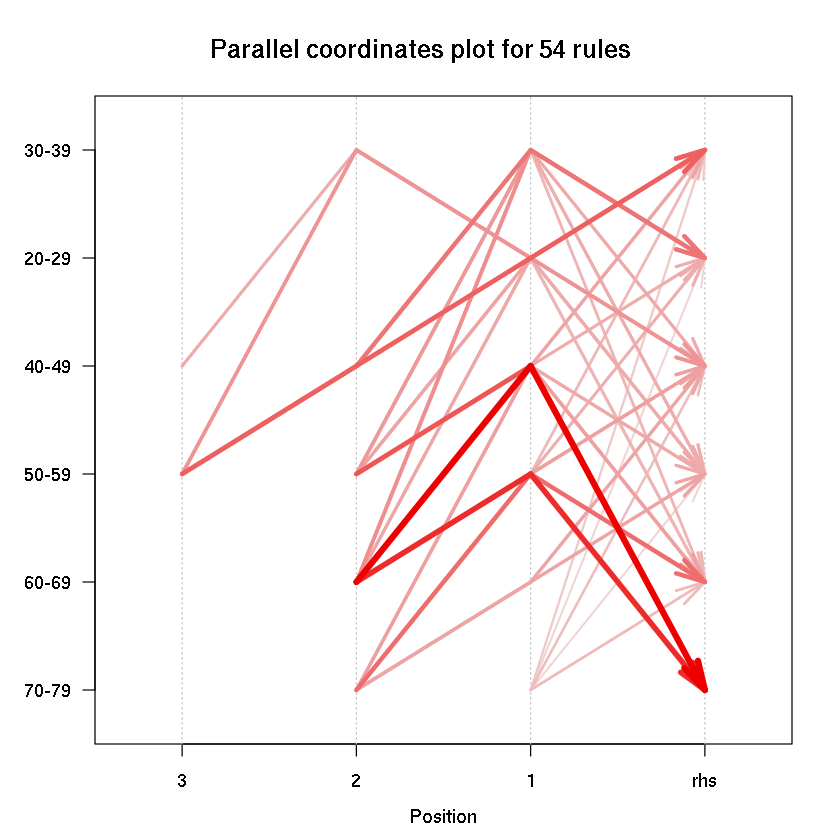

In [7]:
plot(location_rules, method="paracoord", control=list(reorder=TRUE), measure="lift")
dev.copy(pdf, "geo-age-paracoord.pdf")
dev.off()

# Graph of full set of rules

pdf 
  3

png 
  2

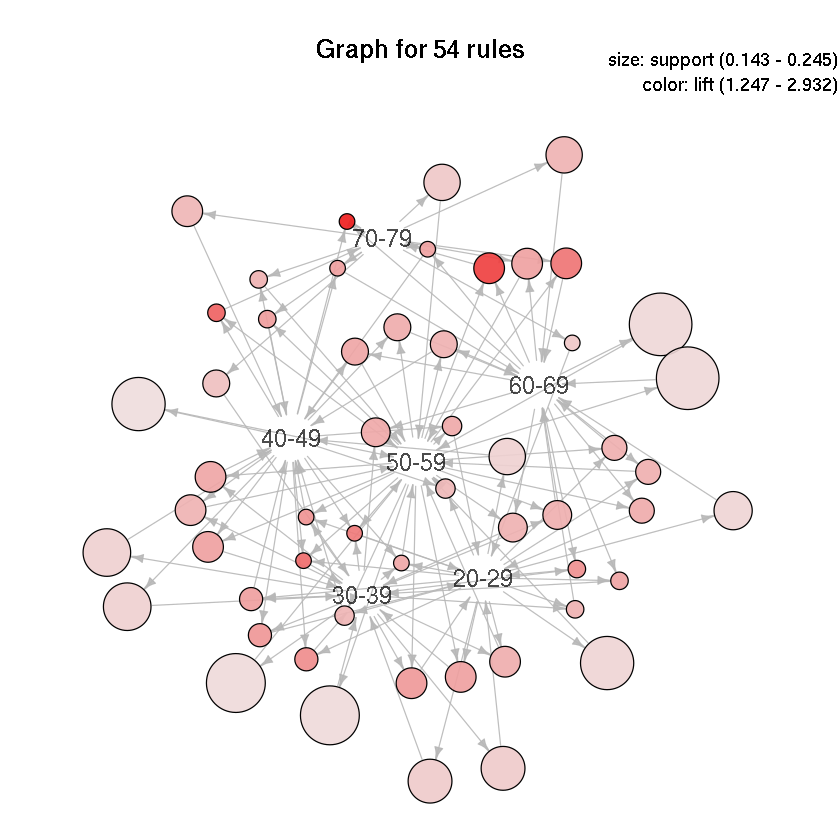

In [8]:
set.seed(2)
plot(location_rules, method="graph", cex=1.3, measure="support", shading="lift", alpha=0.9)
dev.copy(pdf, "geo-age-rules.pdf")
dev.off()

# Interactive viz

## Confidence

In [9]:
set.seed(11)
p <- plot(location_rules, method="graph", measure="support", shading="confidence", engine="htmlwidget")
htmlwidgets::saveWidget(p, "geo-age-rules-confidence.html", title="Rules generated from COVID-19 ages divided up by Geographic region",
                        selfcontained = TRUE)

## Lift

In [10]:
set.seed(11)
p <- plot(location_rules, method="graph", measure="support", shading="lift", engine="htmlwidget")
htmlwidgets::saveWidget(p, "geo-age-rules-lift.html", title="Rules generated from COVID-19 ages divided up by Geographic region",
                        selfcontained = TRUE)